# Ray Tracing with Python Numpy and Matplotlib

In [14]:
#all libraries using in this project
from matplotlib import pyplot as plt
import numpy as np
import time
import numpy.random as random

## Ray Tracing: No Shading

--- 14.938089609146118 seconds ---


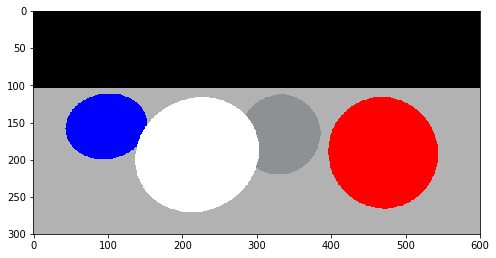

In [12]:
from matplotlib import pyplot as plt
import numpy as np
import time
import numpy.random as random

intersect_factor = 0.1

class Ray(object):
    def __init__(self, _origin, _dir):
        self.origin = np.array(_origin)
        self.direction = normalize(np.array(_dir))
    
    def get_point(self, t):
        return self.origin + (t * self.direction)

class Camera(object):
    def __init__(self, _origin, _horizontal, _vertical, _screen_origin):
        self.origin = np.array(_origin)
        self.horizontal = np.array(_horizontal)
        self.vertical = np.array(_vertical)
        self.screen_origin = np.array(_screen_origin)
        
    def get_ray(self, u, v):
        pixel = self.screen_origin + (self.horizontal * u) + (self.vertical*v)
        direction = pixel - self.origin
        return Ray(self.origin, normalize(direction))
    

class Light(object):
    def __init__(self, _position, _color, _intensity):
        self.position = np.array(_position)
        self.color = np.array(_color)
        self.intensity = _intensity
        
    
class HitPoint(object):
    def __init__(self, _ray, _obj, _t, _point, _normal):
        self.ray = _ray
        self.obj = _obj
        self.t = _t
        self.point = np.array(_point)
        self.normal = np.array(_normal)
    
    

class Sphere(object):
    def __init__(self, _position, _radius, _color):
        self.position = np.array(_position)
        self.radius = _radius
        self.color = _color
        
    def get_normal(self, point, ray):
        normal = point - self.position
        normal = normalize(normal)
        d = np.dot(normal, ray.direction)
        if d <= 0:
            return normal
        else:
            return -normal
    
    def intersect_at(self, ray):
        OP = ray.origin - self.position
        a = np.dot(ray.direction, ray.direction)
        b = 2*np.dot(ray.direction, OP)
        c = np.dot(OP, OP) - (self.radius * self.radius)
        disc = (b*b) - (4*a*c)
        hit_points = []
        if disc > 0:
            discSqrt = np.sqrt(disc)
            t0 = (-b + discSqrt)/2
            if t0 > intersect_factor:
                p0 = ray.get_point(t0)
                n0 = self.get_normal(p0, ray)
                hit_points.append(HitPoint(ray, self, t0, p0, n0))
            t1 = (-b - discSqrt)/2
            if t1 > intersect_factor:
                p1 = ray.get_point(t1)
                n1 = self.get_normal(p1, ray)
                hit_points.append(HitPoint(ray, self, t1, p1, n1))
        elif disc == 0:
            t0 = -b/(2*a)
            if t0 > intersect_factor:
                p0 = ray.get_point(t0)
                n0 = self.get_normal(p0, ray)
                hit_points.append(HitPoint(ray, self, t0, p0, n0))
        return hit_points
            
        
class Plane(object):
    def __init__(self, _position, _normal, _color):
        self.position = np.array(_position)
        self.normal = np.array(_normal)
        self.color = _color
        
    def intersect_at(self, ray):
        numer = np.dot(self.normal, self.position - ray.origin)
        denom = np.dot(self.normal, ray.direction)
        hit_points = []
        if abs(denom) <= 0.001:
            return []
        else:
            t = numer/denom
            if t > intersect_factor:
                p = ray.get_point(t)
                n = normalize(self.normal)
                hit_points.append(HitPoint(ray, self, t, p, n))
            return hit_points  
    
def normalize(vec):
    vec /= np.linalg.norm(vec)
    return vec
    
def magnitude(vec):
    return np.linalg.norm(vec)
    
def find_hit_point(ray, scene):
    hit_point = None
    t = None
    for obj in scene:
        intersection = obj.intersect_at(ray)
        for hit in intersection:
            if hit_point == None:
                hit_point = hit
                t = hit.t
            else:
                if hit.t < t:
                    hit_point = hit
                    t = hit.t
    if hit_point == None:
        return None
    return hit_point

def trace_ray(ray, scenes):
    col = np.array([0., 0., 0.])
    hit_point = find_hit_point(ray, scenes)
    if hit_point == None:
        return col
    else:
        return hit_point.obj.color
    
screen_size = (300, 600, 3)
samples = 50
height, width = screen_size[:2]
image_array = np.ones(screen_size)
depth_max = 5

s1 = Sphere([1.8, .1, 0.7], .6, [1., 0., 0.])
s2 = Sphere([-0.17, .1, .6], .6, [1., 1., 1.])
s3 =  Sphere([-3, .1, 3], .6, [0., 0., 1.])
s4 =  Sphere([0.4, .1, 2.], .6, [.56, .57, .58])
p1 = Plane([0., -.5, 0.], [0., 1., 0.],  np.ones(3)*0.7)

scenes = [s1, s2, s3, s4, p1]
camera = Camera([1.4, 0.8, -2.8], [4, 0., 0.], [0., 2, 0.], [-1.4, -.5, 0.])

start_time = time.time()
for x in range(width):
    for y in range(height):
        u = x/width
        v = y/height
        ray = camera.get_ray(u, v)
        image_array[height - 1 - y, x, :] = np.clip(trace_ray(ray, scenes), 0, 1)
print("--- %s seconds ---" % (time.time() - start_time))
plt.figure(figsize=(8,7))
plt.imsave("RT-Before.png", image_array)
plt.imshow(image_array)

## Ray Tracing : Shadow and Illumination

--- 42.72526955604553 seconds ---


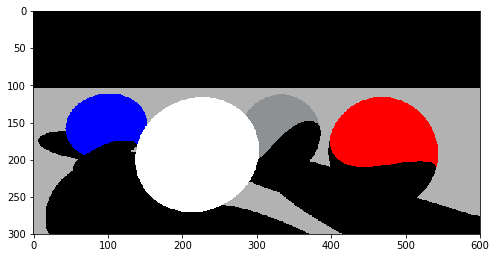

In [13]:
from matplotlib import pyplot as plt
import numpy as np
import time
import numpy.random as random

intersect_factor = 0.1

class Ray(object):
    def __init__(self, _origin, _dir):
        self.origin = np.array(_origin)
        self.direction = normalize(np.array(_dir))
    
    def get_point(self, t):
        return self.origin + (t * self.direction)

class Camera(object):
    def __init__(self, _origin, _horizontal, _vertical, _screen_origin):
        self.origin = np.array(_origin)
        self.horizontal = np.array(_horizontal)
        self.vertical = np.array(_vertical)
        self.screen_origin = np.array(_screen_origin)
        
    def get_ray(self, u, v):
        pixel = self.screen_origin + (self.horizontal * u) + (self.vertical*v)
        direction = pixel - self.origin
        return Ray(self.origin, normalize(direction))
    

class Light(object):
    def __init__(self, _position, _color, _intensity):
        self.position = np.array(_position)
        self.color = np.array(_color)
        self.intensity = _intensity
        
    
class HitPoint(object):
    def __init__(self, _ray, _obj, _t, _point, _normal):
        self.ray = _ray
        self.obj = _obj
        self.t = _t
        self.point = np.array(_point)
        self.normal = np.array(_normal)
    
    

class Sphere(object):
    def __init__(self, _position, _radius, _color):
        self.position = np.array(_position)
        self.radius = _radius
        self.color = _color
        
    def get_normal(self, point, ray):
        normal = point - self.position
        normal = normalize(normal)
        d = np.dot(normal, ray.direction)
        if d <= 0:
            return normal
        else:
            return -normal
    
    def intersect_at(self, ray):
        OP = ray.origin - self.position
        a = np.dot(ray.direction, ray.direction)
        b = 2*np.dot(ray.direction, OP)
        c = np.dot(OP, OP) - (self.radius * self.radius)
        disc = (b*b) - (4*a*c)
        hit_points = []
        if disc > 0:
            discSqrt = np.sqrt(disc)
            t0 = (-b + discSqrt)/2
            if t0 > intersect_factor:
                p0 = ray.get_point(t0)
                n0 = self.get_normal(p0, ray)
                hit_points.append(HitPoint(ray, self, t0, p0, n0))
            t1 = (-b - discSqrt)/2
            if t1 > intersect_factor:
                p1 = ray.get_point(t1)
                n1 = self.get_normal(p1, ray)
                hit_points.append(HitPoint(ray, self, t1, p1, n1))
        elif disc == 0:
            t0 = -b/(2*a)
            if t0 > intersect_factor:
                p0 = ray.get_point(t0)
                n0 = self.get_normal(p0, ray)
                hit_points.append(HitPoint(ray, self, t0, p0, n0))
        return hit_points
            
        
class Plane(object):
    def __init__(self, _position, _normal, _color):
        self.position = np.array(_position)
        self.normal = np.array(_normal)
        self.color = _color
        
    def intersect_at(self, ray):
        numer = np.dot(self.normal, self.position - ray.origin)
        denom = np.dot(self.normal, ray.direction)
        hit_points = []
        if abs(denom) <= 0.001:
            return []
        else:
            t = numer/denom
            if t > intersect_factor:
                p = ray.get_point(t)
                n = normalize(self.normal)
                hit_points.append(HitPoint(ray, self, t, p, n))
            return hit_points  
    
def normalize(vec):
    vec /= np.linalg.norm(vec)
    return vec
    
def magnitude(vec):
    return np.linalg.norm(vec)
    
def find_hit_point(ray, scene, hp_obj=None):
    hit_point = None
    t = None
    for obj in scene:
        if id(obj) == id(hp_obj):
            continue
        intersection = obj.intersect_at(ray)
        for hit in intersection:
            if hit_point == None:
                hit_point = hit
                t = hit.t
            else:
                if hit.t < t:
                    hit_point = hit
                    t = hit.t
    if hit_point == None:
        return None
    return hit_point

def shade(hit_point, scenes, lights):
    point = hit_point.point
    obj = hit_point.obj
    for light in lights:
        to_light = normalize(light.position - point)
        light_ray = Ray(point, to_light)
        hit = find_hit_point(light_ray, scenes, obj)
        if hit != None:
            return np.array([0., 0., 0.])
    return obj.color

def trace_ray(ray, scenes, lights):
    col = np.array([0., 0., 0.])
    hit_point = find_hit_point(ray, scenes)
    if hit_point == None:
        return col
    else:
        return shade(hit_point, scenes, lights)
    
screen_size = (300, 600, 3)
samples = 50
height, width = screen_size[:2]
image_array = np.ones(screen_size)
depth_max = 5

s1 = Sphere([1.8, .1, 0.7], .6, [1., 0., 0.])
s2 = Sphere([-0.17, .1, .6], .6, [1., 1., 1.])
s3 =  Sphere([-3, .1, 3], .6, [0., 0., 1.])
s4 =  Sphere([0.4, .1, 2.], .6, [.56, .57, .58])
p1 = Plane([0., -.5, 0.], [0., 1., 0.],  np.ones(3)*0.7)

scenes = [s1, s2, s3, s4, p1]
camera = Camera([1.4, 0.8, -2.8], [4, 0., 0.], [0., 2, 0.], [-1.4, -.5, 0.])
lights = [Light([12., 5., -10.], np.ones(3), 1), Light([-25., 10., 30.], np.ones(3), 1)]
    
start_time = time.time()
for x in range(width):
    for y in range(height):
        u = x/width
        v = y/height
        ray = camera.get_ray(u, v)
        image_array[height - 1 - y, x, :] = np.clip(trace_ray(ray, scenes, lights), 0, 1)
print("--- %s seconds ---" % (time.time() - start_time))
plt.figure(figsize=(8,7))
plt.imsave("RT-SI.png", image_array)
plt.imshow(image_array)

## Ray Tracing: Object's surface & Shading

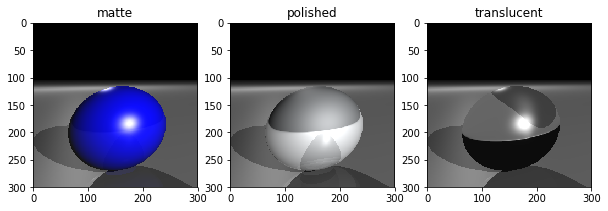

--- 59.93660378456116 seconds ---


<Figure size 432x288 with 0 Axes>

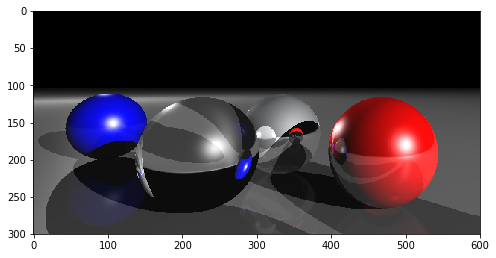

In [20]:
#all dependencies
from matplotlib import pyplot as plt
import numpy as np
import time
import numpy.random as random

"""
    preventing an object from intersection itself
"""
intersect_factor = 0.1

class Ray(object):
    """
        Ray (line) object in 3D represented by origin and destination
    """
    def __init__(self, _origin, _dir):
        self.origin = np.array(_origin)
        self.direction = normalize(np.array(_dir))
        
    def __repr__(self):
        """
            attributes of Ray in string
        """
        return ("Ray {0}, "\
                "origin={1}, "\
                "dest={2}, "\
                .format( id(self), 
                    self.origin, 
                    self.direction
                  )
                )
    
    def get_point(self, t):
        """
            get a point on the ray at a given specific time t
        """
        return self.origin + (t * self.direction)

class Camera(object):
    """
        Camera object indicates the viewer perspective of the screen in XY plane. 
        The object represented by the viewer origin, horizontal scale, vertical scale and screen position
    """
    def __init__(self, _origin, _horizontal, _vertical, _screen_origin):
        self.origin = np.array(_origin)
        self.horizontal = np.array(_horizontal)
        self.vertical = np.array(_vertical)
        self.screen_origin = np.array(_screen_origin)
        
    def get_ray(self, u, v):
        """
            get a ray in the direction of pixel (u, v)
        """
        pixel = self.screen_origin + (self.horizontal * u) + (self.vertical*v)
        direction = pixel - self.origin
        return Ray(self.origin, normalize(direction))
    
    def __repr__(self):
        """
            attributes of Camera in string
        """
        return ("Camera {0}, "\
                "origin={1}, "\
                "horizontal={2}, "\
                "vertical={3}, "\
                "screen_origin={4}"\
                .format( id(self), 
                    self.origin,
                    self.horizontal,
                    self.vertical,
                    self.screen_origin
                  )
                )

class Light(object):
    """
        Light object represented by position, color and intensity
    """
    def __init__(self, _position, _color, _intensity):
        self.position = np.array(_position)
        self.color = np.array(_color)
        self.intensity = _intensity
        
    def __repr__(self):
        """
            attributes of Light in string
        """
        return ("Light {0}, "\
                "position={1}, "\
                "color={2}, "\
                "intensity={3}"\
                .format( id(self), 
                    self.position, 
                    self.color,
                    self.intensity
                  )
                )
    
class HitPoint(object):
    """
        Point of intersection between a shape and a ray represented by ray, object, 
        time, point and normal vector
    """
    def __init__(self, _ray, _obj, _t, _point, _normal):
        self.ray = _ray
        self.obj = _obj
        self.t = _t
        self.point = np.array(_point)
        self.normal = np.array(_normal)
    
    def __repr__(self):
        """
            attributes of HitPoint in string
        """
        return ("HitPoint {0}, "\
                "ray={1}, "\
                "obj={2}, "\
                "t={3}, "\
                "point={4}, "\
                "normal={5}"\
                .format(id(self), 
                  self.ray,
                  self.obj,
                  self.t,
                  self.point,
                  self.normal
                 )
               )
    
class Surface(object):
    """
        properties of an object consist of diffuse coefficient, reflect coefficient, 
        ambient coefficient, specular coefficient and color
    """
    def __init__(self, _reflect, _diffuse, _specular, _specular_exp, _ambient, _refract, _color):
        self.reflect = _reflect
        self.diffuse = _diffuse
        self.specular = _specular
        self.specular_exp = _specular_exp
        self.ambient = _ambient
        self.refract = _refract
        self.color = np.array(_color)
    
    def __repr__(self):
        """
            attributes of Surface in string
        """
        return ("Surface {0}, "\
                "reflect={1}, "\
                "diffuse={2}, "\
                "specular={3}, "\
                "specular_exp={4}, "\
                "ambient={5}, "\
                "transmissive={6}"\
                "color={7}"\
                .format(id(self), 
                  self.reflect,
                  self.diffuse,
                  self.specular,
                  self.specular_exp,
                  self.ambient,
                  self.refract,
                  self.color
                 )
               )
        

class Sphere(object):
    """
        3D sphere represented by position, radius and surface
    """
    def __init__(self, _position, _radius, _surface):
        self.position = np.array(_position)
        self.radius = _radius
        self.surface = _surface
        
    def __repr__(self):
        """
            attributes of Sphere in string
        """
        return ("Sphere {0}, "\
                "position={1}, "\
                "radius={2}, "\
                "color={3}"\
                .format(id(self), 
                  self.position,
                  self.radius,
                  self.surface
                 )
               )
    
    def get_normal(self, point, ray):
        """
            Get a normal vector of the sphere on a surface at the given point (calculate by point - center)
            Normal vectors are in 2 opposite direction depends on the dot product with the incoming ray
        """
        normal = point - self.position
        normal = normalize(normal)
        d = np.dot(normal, ray.direction)
        if d <= 0:
            return normal
        else:
            return -normal
    
    def intersect_at(self, ray):
        """
            solving roots of quadratic equation to find point(s) of intersection to the sphere
            ||O + t*D - P|| - R^2 = 0
            at^2 + b^t + c = 0
            return Empty List if no intersection
        """
        OP = ray.origin - self.position
        a = np.dot(ray.direction, ray.direction)
        b = 2*np.dot(ray.direction, OP)
        c = np.dot(OP, OP) - (self.radius * self.radius)
        disc = (b*b) - (4*a*c)
        hit_points = []
        if disc > 0:
            """
                line passes through the sphere resulting in 2 intersections
            """
            discSqrt = np.sqrt(disc)
            t0 = (-b + discSqrt)/2
            if t0 > intersect_factor:
                p0 = ray.get_point(t0)
                n0 = self.get_normal(p0, ray)
                hit_points.append(HitPoint(ray, self, t0, p0, n0))
            t1 = (-b - discSqrt)/2
            if t1 > intersect_factor:
                p1 = ray.get_point(t1)
                n1 = self.get_normal(p1, ray)
                hit_points.append(HitPoint(ray, self, t1, p1, n1))
        elif disc == 0:
            """
                ray tangent to the sphere surface resulting in 1 intersection
            """
            t0 = -b/(2*a)
            if t0 > intersect_factor:
                p0 = ray.get_point(t0)
                n0 = self.get_normal(p0, ray)
                hit_points.append(HitPoint(ray, self, t0, p0, n0))
        return hit_points
            
        
class Plane(object):
    """
        3D Plane represented by position, normal vector and surface
    """
    def __init__(self, _position, _normal, _surface):
        self.position = np.array(_position)
        self.normal = np.array(_normal)
        self.surface = _surface
        
    def __repr__(self):
        """
            attributes of Plane in string
        """
        return ("Plane {0}, "\
                "position={1}, "\
                "normal={2}, "\
                "surface={3}"\
                .format(id(self), 
                  self.position,
                  self.normal,
                  self.surface
                 )
               )
    
    def intersect_at(self, ray):
        """ 
            finding point of intersection to a plane
            N.(O + t*D -P) = 0
            return Empty List if no intersection
        """
        numer = np.dot(self.normal, self.position - ray.origin)
        denom = np.dot(self.normal, ray.direction)
        hit_points = []
        if abs(denom) <= 0.001:
            """
                the case of the ray parallel to the plane
            """
            return []
        else:
            """
                intersect the plane only one point
            """
            t = numer/denom
            if t > intersect_factor:
                p = ray.get_point(t)
                n = normalize(self.normal)
                hit_points.append(HitPoint(ray, self, t, p, n))
            return hit_points  
    
def normalize(vec):
    """
        Normalie a given vector by dividing by its norm
    """
    vec /= np.linalg.norm(vec)
    return vec
    
def magnitude(vec):
    """
        Vector Norm
    """
    return np.linalg.norm(vec)
        
def diffuse(to_light, normal, diff_c, color, intensity):
    """
        Diffuse reflection by Lambert Shading
    """
    return np.clip(color * intensity * diff_c * max(0, np.dot(normal, to_light)),0,1)

def specular(to_light, normal, spec_c , spec_exp, to_viewer, light_color, intensity):
    """
        Specular reflection by Phong Shading
    """
    sum_light = normalize(to_viewer+to_light)
    return np.clip(light_color * intensity * spec_c * max(0, np.dot(normal, sum_light))**spec_exp, 0, 1)
    
def transmission(ray, obj):
    hit_points = obj.intersect_at(ray)
    if not hit_points:
        return None
    hit_points = sorted(hit_points, key=lambda x:x.t)
    hit_point = hit_points[0]
    normal = hit_point.normal
    direction = ray.direction
    dot = np.dot(ray.direction, hit_point.normal)
    a = obj.surface.refract
    b = (a * dot) + np.sqrt(1 + (a**2 * (dot**2-1)))
    new_dir = normalize(a*ray.direction - b*hit_point.normal)
    return Ray(hit_point.point, new_dir)
    
def shade(hit_point, scenes, lights):
    """
        return a reflected color from other objects
        calculating cumulative diffuse reflection and specular reflection from each light source
    """
    # necessary attributes of object's surface
    surface = hit_point.obj.surface
    diff_c = surface.diffuse
    spec_c = surface.specular
    spec_exp = surface.specular_exp
    color = surface.color
    
    # neccessary attributes of hit point
    point = hit_point.point
    normal = hit_point.normal
    obj = hit_point.obj
    to_viewer = -hit_point.ray.direction
    
    # light attribute
    to_light = None
    intensity = None
    light_color = None
    
    # shading color result
    shading = np.ones(3)*surface.ambient
    hit = None
    
    for light in lights:
        to_light = normalize(light.position - point)
        intensity = light.intensity
        light_color = light.color
        
        light_ray = Ray(point, to_light)
        hit = find_hit_point(light_ray, scenes, hit_point.obj)
        if hit == None:
            shading += diffuse(to_light, normal, diff_c, color, intensity) 
            shading += specular(to_light, normal, spec_c, spec_exp, to_viewer, 
                            light_color, intensity)
        
    return shading

def find_hit_point(ray, scene, hp_obj=None):
    """
        Find all hit points on objects in the scene
        return None if no intersection
    """
    hit_point = None
    t = None
    for obj in scene:
        if id(obj) == id(hp_obj):
            continue
        intersection = obj.intersect_at(ray)
        for hit in intersection:
            if hit_point == None:
                hit_point = hit
                t = hit.t
            else:
                if hit.t < t:
                    hit_point = hit
                    t = hit.t
    if hit_point == None:
        return None
    return hit_point

def trace_ray(ray, scenes, lights, hp_obj=None, dmax=5):
    col = np.array([0., 0., 0.])
    hit_point = find_hit_point(ray, scenes, hp_obj)
    if hit_point == None:
        return col
    else:
        obj  = hit_point.obj
        point = hit_point.point
        direction = ray.direction
        obj_reflect = obj.surface.reflect
        obj_refract = obj.surface.refract
        normal = hit_point.normal
        reflected_col = np.array([0., 0., 0.,])
        if dmax > 0:
            if obj_refract > 0:
                dot = np.dot(direction, normal)
                a = 1/obj_refract
                b = (a * dot) + np.sqrt(1 + (a**2 * (dot**2-1)))
                new_dir = normalize(a*direction - b*normal)
                new_ray_refract = Ray(point, new_dir)
                new_ray = transmission(new_ray_refract, obj)
                if new_ray != None:
                    reflected_col = trace_ray(new_ray, scenes, lights, obj, dmax-1)
                
            else:
                new_dir = normalize(direction - (2*np.dot(direction, normal)*normal))
                new_ray = Ray(point, new_dir)
                reflected_col = trace_ray(new_ray, scenes, lights, obj, dmax-1) * obj_reflect
        
        shading = shade(hit_point, scenes, lights)
        col += shading + reflected_col
        return col

    
mini_screen_size = (300, 300, 3)
mini_h, mini_w = mini_screen_size[:2]
mini_image_array = np.ones(mini_screen_size)
mini_dm = 5

matte = Surface(.1, 1., 1., 50, .05, 0., [0., 0., 1.])
polished = Surface(1., 1., 0.2, 10, .05, 0., [.56, .57, .58])
translucent = Surface(1., 0., 0.7, 50, 0.05, 1.485, [1., 1., 1.])
surfaces = [matte, polished, translucent]
surface_name = ["matte", "polished", "translucent"]
f, axes = plt.subplots(1, 3, figsize=(10,15))

for ax in range(len(axes)):
    sphere = Sphere([-0.7, .1, .6], .6, surfaces[ax])
    plane = Plane([0., -.5, 0.], [0., 1., 0.], Surface(0.1, .75, .2, 50, .05, 0., np.ones(3)*0.7))
    scenes = [sphere, plane]
    lights = [Light([12., 5., -10.], np.ones(3), 1), Light([-25., 10., 30.], np.ones(3), 1)]
    camera = Camera([1.4, 0.8, -2.8], [4, 0., 0.], [0., 2, 0.], [-1.4, -.5, 0.])
    for x in range(mini_w):
        for y in range(mini_h):
            u = x/width
            v = y/height
            ray = camera.get_ray(u, v)
            mini_image_array[height - 1 - y, x, :] = np.clip(trace_ray(ray, scenes, lights), 0, 1)
    axes[ax].imshow(mini_image_array)
    axes[ax].set_title(surface_name[ax])
f.savefig('obj_surfaces.png')
plt.show()
plt.figure()

screen_size = (300, 600, 3)
height, width = screen_size[:2]
image_array = np.ones(screen_size)
depth_max = 5

s1_surface = Surface(.5, 1., 1., 50, .05, 0.,[1., 0., 0.])
s1 = Sphere([1.8, .1, 0.7], .6, s1_surface)

s2_surface = Surface(1., 0., 0.7, 50, 0.05, 1.485, [1., 1., 1.])
s2 = Sphere([-0.17, .1, .6], .6, s2_surface)

s3_surface = Surface(.1, 1., 1., 50, .05, 0., [0., 0., 1.])
s3 =  Sphere([-3, .1, 3], .6, s3_surface)

s4_surface = Surface(1., 1., 0.2, 10, .05, 0., [.56, .57, .58])
s4 =  Sphere([0.4, .1, 2.], .6, s4_surface)

p1_surface = Surface(0.1, .75, .2, 50, .05, 0., np.ones(3)*0.7)
p1 = Plane([0., -.5, 0.], [0., 1., 0.], p1_surface)

scenes = [s1, s2, s3, s4, p1]
lights = [Light([12., 5., -10.], np.ones(3), 1), Light([-25., 10., 30.], np.ones(3), 1)]
camera = Camera([1.4, 0.8, -2.8], [4, 0., 0.], [0., 2, 0.], [-1.4, -.5, 0.])


start_time = time.time()
for x in range(width):
    for y in range(height):
        u = x/width
        v = y/height
        ray = camera.get_ray(u, v)
        image_array[height - 1 - y, x, :] = np.clip(trace_ray(ray, scenes, lights), 0, 1)
print("--- %s seconds ---" % (time.time() - start_time))
plt.figure(figsize=(8,7))
plt.imsave("RT-0.png", image_array)
plt.imshow(image_array)

## Ray Tracing: Monte Carlo Anti-Alias of 100 Samples

--- 5470.497057914734 seconds ---


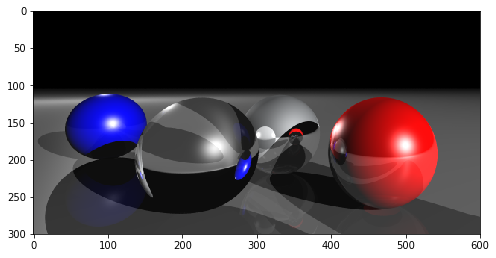

In [17]:
#all dependencies
from matplotlib import pyplot as plt
import numpy as np
import time
import numpy.random as random

"""
    preventing an object from intersection itself
"""
intersect_factor = 0.1

class Ray(object):
    """
        Ray (line) object in 3D represented by origin and destination
    """
    def __init__(self, _origin, _dir):
        self.origin = np.array(_origin)
        self.direction = normalize(np.array(_dir))
        
    def __repr__(self):
        """
            attributes of Ray in string
        """
        return ("Ray {0}, "\
                "origin={1}, "\
                "dest={2}, "\
                .format( id(self), 
                    self.origin, 
                    self.direction
                  )
                )
    
    def get_point(self, t):
        """
            get a point on the ray at a given specific time t
        """
        return self.origin + (t * self.direction)

class Camera(object):
    """
        Camera object indicates the viewer perspective of the screen in XY plane. 
        The object represented by the viewer origin, horizontal scale, vertical scale and screen position
    """
    def __init__(self, _origin, _horizontal, _vertical, _screen_origin):
        self.origin = np.array(_origin)
        self.horizontal = np.array(_horizontal)
        self.vertical = np.array(_vertical)
        self.screen_origin = np.array(_screen_origin)
        
    def get_ray(self, u, v):
        """
            get a ray in the direction of pixel (u, v)
        """
        pixel = self.screen_origin + (self.horizontal * u) + (self.vertical*v)
        direction = pixel - self.origin
        return Ray(self.origin, normalize(direction))
    
    def __repr__(self):
        """
            attributes of Camera in string
        """
        return ("Camera {0}, "\
                "origin={1}, "\
                "horizontal={2}, "\
                "vertical={3}, "\
                "screen_origin={4}"\
                .format( id(self), 
                    self.origin,
                    self.horizontal,
                    self.vertical,
                    self.screen_origin
                  )
                )

class Light(object):
    """
        Light object represented by position, color and intensity
    """
    def __init__(self, _position, _color, _intensity):
        self.position = np.array(_position)
        self.color = np.array(_color)
        self.intensity = _intensity
        
    def __repr__(self):
        """
            attributes of Light in string
        """
        return ("Light {0}, "\
                "position={1}, "\
                "color={2}, "\
                "intensity={3}"\
                .format( id(self), 
                    self.position, 
                    self.color,
                    self.intensity
                  )
                )
    
class HitPoint(object):
    """
        Point of intersection between a shape and a ray represented by ray, object, 
        time, point and normal vector
    """
    def __init__(self, _ray, _obj, _t, _point, _normal):
        self.ray = _ray
        self.obj = _obj
        self.t = _t
        self.point = np.array(_point)
        self.normal = np.array(_normal)
    
    def __repr__(self):
        """
            attributes of HitPoint in string
        """
        return ("HitPoint {0}, "\
                "ray={1}, "\
                "obj={2}, "\
                "t={3}, "\
                "point={4}, "\
                "normal={5}"\
                .format(id(self), 
                  self.ray,
                  self.obj,
                  self.t,
                  self.point,
                  self.normal
                 )
               )
    
class Surface(object):
    """
        properties of an object consist of diffuse coefficient, reflect coefficient, 
        ambient coefficient, specular coefficient and color
    """
    def __init__(self, _reflect, _diffuse, _specular, _specular_exp, _ambient, _refract, _color):
        self.reflect = _reflect
        self.diffuse = _diffuse
        self.specular = _specular
        self.specular_exp = _specular_exp
        self.ambient = _ambient
        self.refract = _refract
        self.color = np.array(_color)
    
    def __repr__(self):
        """
            attributes of Surface in string
        """
        return ("Surface {0}, "\
                "reflect={1}, "\
                "diffuse={2}, "\
                "specular={3}, "\
                "specular_exp={4}, "\
                "ambient={5}, "\
                "transmissive={6}"\
                "color={7}"\
                .format(id(self), 
                  self.reflect,
                  self.diffuse,
                  self.specular,
                  self.specular_exp,
                  self.ambient,
                  self.refract,
                  self.color
                 )
               )
        

class Sphere(object):
    """
        3D sphere represented by position, radius and surface
    """
    def __init__(self, _position, _radius, _surface):
        self.position = np.array(_position)
        self.radius = _radius
        self.surface = _surface
        
    def __repr__(self):
        """
            attributes of Sphere in string
        """
        return ("Sphere {0}, "\
                "position={1}, "\
                "radius={2}, "\
                "color={3}"\
                .format(id(self), 
                  self.position,
                  self.radius,
                  self.surface
                 )
               )
    
    def get_normal(self, point, ray):
        """
            Get a normal vector of the sphere on a surface at the given point (calculate by point - center)
            Normal vectors are in 2 opposite direction depends on the dot product with the incoming ray
        """
        normal = point - self.position
        normal = normalize(normal)
        d = np.dot(normal, ray.direction)
        if d <= 0:
            return normal
        else:
            return -normal
    
    def intersect_at(self, ray):
        """
            solving roots of quadratic equation to find point(s) of intersection to the sphere
            ||O + t*D - P|| - R^2 = 0
            at^2 + b^t + c = 0
            return Empty List if no intersection
        """
        OP = ray.origin - self.position
        a = np.dot(ray.direction, ray.direction)
        b = 2*np.dot(ray.direction, OP)
        c = np.dot(OP, OP) - (self.radius * self.radius)
        disc = (b*b) - (4*a*c)
        hit_points = []
        if disc > 0:
            """
                line passes through the sphere resulting in 2 intersections
            """
            discSqrt = np.sqrt(disc)
            t0 = (-b + discSqrt)/2
            if t0 > intersect_factor:
                p0 = ray.get_point(t0)
                n0 = self.get_normal(p0, ray)
                hit_points.append(HitPoint(ray, self, t0, p0, n0))
            t1 = (-b - discSqrt)/2
            if t1 > intersect_factor:
                p1 = ray.get_point(t1)
                n1 = self.get_normal(p1, ray)
                hit_points.append(HitPoint(ray, self, t1, p1, n1))
        elif disc == 0:
            """
                ray tangent to the sphere surface resulting in 1 intersection
            """
            t0 = -b/(2*a)
            if t0 > intersect_factor:
                p0 = ray.get_point(t0)
                n0 = self.get_normal(p0, ray)
                hit_points.append(HitPoint(ray, self, t0, p0, n0))
        return hit_points
            
        
class Plane(object):
    """
        3D Plane represented by position, normal vector and surface
    """
    def __init__(self, _position, _normal, _surface):
        self.position = np.array(_position)
        self.normal = np.array(_normal)
        self.surface = _surface
        
    def __repr__(self):
        """
            attributes of Plane in string
        """
        return ("Plane {0}, "\
                "position={1}, "\
                "normal={2}, "\
                "surface={3}"\
                .format(id(self), 
                  self.position,
                  self.normal,
                  self.surface
                 )
               )
    
    def intersect_at(self, ray):
        """ 
            finding point of intersection to a plane
            N.(O + t*D -P) = 0
            return Empty List if no intersection
        """
        numer = np.dot(self.normal, self.position - ray.origin)
        denom = np.dot(self.normal, ray.direction)
        hit_points = []
        if abs(denom) <= 0.001:
            """
                the case of the ray parallel to the plane
            """
            return []
        else:
            """
                intersect the plane only one point
            """
            t = numer/denom
            if t > intersect_factor:
                p = ray.get_point(t)
                n = normalize(self.normal)
                hit_points.append(HitPoint(ray, self, t, p, n))
            return hit_points  
    
def normalize(vec):
    """
        Normalie a given vector by dividing by its norm
    """
    vec /= np.linalg.norm(vec)
    return vec
    
def magnitude(vec):
    """
        Vector Norm
    """
    return np.linalg.norm(vec)
        
def diffuse(to_light, normal, diff_c, color, intensity):
    """
        Diffuse reflection by Lambert Shading
    """
    return np.clip(color * intensity * diff_c * max(0, np.dot(normal, to_light)),0,1)

def specular(to_light, normal, spec_c , spec_exp, to_viewer, light_color, intensity):
    """
        Specular reflection by Phong Shading
    """
    sum_light = normalize(to_viewer+to_light)
    return np.clip(light_color * intensity * spec_c * max(0, np.dot(normal, sum_light))**spec_exp, 0, 1)
    
def transmission(ray, obj):
    hit_points = obj.intersect_at(ray)
    if not hit_points:
        return None
    hit_points = sorted(hit_points, key=lambda x:x.t)
    hit_point = hit_points[0]
    normal = hit_point.normal
    direction = ray.direction
    dot = np.dot(ray.direction, hit_point.normal)
    a = obj.surface.refract
    b = (a * dot) + np.sqrt(1 + (a**2 * (dot**2-1)))
    new_dir = normalize(a*ray.direction - b*hit_point.normal)
    return Ray(hit_point.point, new_dir)
    
def shade(hit_point, scenes, lights):
    """
        return a reflected color from other objects
        calculating cumulative diffuse reflection and specular reflection from each light source
    """
    # necessary attributes of object's surface
    surface = hit_point.obj.surface
    diff_c = surface.diffuse
    spec_c = surface.specular
    spec_exp = surface.specular_exp
    color = surface.color
    
    # neccessary attributes of hit point
    point = hit_point.point
    normal = hit_point.normal
    obj = hit_point.obj
    to_viewer = -hit_point.ray.direction
    
    # light attribute
    to_light = None
    intensity = None
    light_color = None
    
    # shading color result
    shading = np.ones(3)*surface.ambient
    hit = None
    
    for light in lights:
        to_light = normalize(light.position - point)
        intensity = light.intensity
        light_color = light.color
        
        light_ray = Ray(point, to_light)
        hit = find_hit_point(light_ray, scenes, hit_point.obj)
        if hit == None:
            shading += diffuse(to_light, normal, diff_c, color, intensity) 
            shading += specular(to_light, normal, spec_c, spec_exp, to_viewer, 
                            light_color, intensity)
        
    return shading

def find_hit_point(ray, scene, hp_obj=None):
    """
        Find all hit points on objects in the scene
        return None if no intersection
    """
    hit_point = None
    t = None
    for obj in scene:
        if id(obj) == id(hp_obj):
            continue
        intersection = obj.intersect_at(ray)
        for hit in intersection:
            if hit_point == None:
                hit_point = hit
                t = hit.t
            else:
                if hit.t < t:
                    hit_point = hit
                    t = hit.t
    if hit_point == None:
        return None
    return hit_point

def trace_ray(ray, scenes, lights, hp_obj=None, dmax=5):
    col = np.array([0., 0., 0.])
    hit_point = find_hit_point(ray, scenes, hp_obj)
    if hit_point == None:
        return col
    else:
        obj  = hit_point.obj
        point = hit_point.point
        direction = ray.direction
        obj_reflect = obj.surface.reflect
        obj_refract = obj.surface.refract
        normal = hit_point.normal
        reflected_col = np.array([0., 0., 0.,])
        if dmax > 0:
            if obj_refract > 0:
                dot = np.dot(direction, normal)
                a = 1/obj_refract
                b = (a * dot) + np.sqrt(1 + (a**2 * (dot**2-1)))
                new_dir = normalize(a*direction - b*normal)
                new_ray_refract = Ray(point, new_dir)
                new_ray = transmission(new_ray_refract, obj)
                if new_ray != None:
                    reflected_col = trace_ray(new_ray, scenes, lights, obj, dmax-1)
                
            else:
                new_dir = normalize(direction - (2*np.dot(direction, normal)*normal))
                new_ray = Ray(point, new_dir)
                reflected_col = trace_ray(new_ray, scenes, lights, obj, dmax-1) * obj_reflect
        
        shading = shade(hit_point, scenes, lights)
        col += shading + reflected_col
        return col

screen_size = (300, 600, 3)
samples = 100
height, width = screen_size[:2]
image_array = np.ones(screen_size)
depth_max = 5

s1_surface = Surface(.5, 1., 1., 50, .05, 0.,[1., 0., 0.])
s1 = Sphere([1.8, .1, 0.7], .6, s1_surface)

s2_surface = Surface(1., 0., 0.7, 50, 0.05, 1.485, [1., 1., 1.])
s2 = Sphere([-0.17, .1, .6], .6, s2_surface)

s3_surface = Surface(.1, 1., 1., 50, .05, 0., [0., 0., 1.])
s3 =  Sphere([-3, .1, 3], .6, s3_surface)

s4_surface = Surface(1., 1., 0.2, 10, .05, 0., [.56, .57, .58])
s4 =  Sphere([0.4, .1, 2.], .6, s4_surface)

p1_surface = Surface(0.1, .75, .2, 50, .05, 0., np.ones(3)*0.7)
p1 = Plane([0., -.5, 0.], [0., 1., 0.], p1_surface)

scenes = [s1, s2, s3, s4, p1]
lights = [Light([12., 5., -10.], np.ones(3), 1), Light([-25., 10., 30.], np.ones(3), 1)]
camera = Camera([1.4, 0.8, -2.8], [4, 0., 0.], [0., 2, 0.], [-1.4, -.5, 0.])

start_time = time.time()
for x in range(width):
    for y in range(height):
        c = np.zeros(3)
        for s in range(samples):
            u = (x + random.random()) / width
            v = (y + random.random()) / height
            ray = camera.get_ray(u, v)
            c += trace_ray(ray, scenes, lights)
        
        c = c / samples
        image_array[height - 1 - y][x] = np.clip(c, 0, 1)

print("--- %s seconds ---" % (time.time() - start_time))
plt.figure(figsize=(8,7))
plt.imsave("RT-1.png", image_array)
plt.imshow(image_array)